## Imports

In [1]:
from ipynb.fs.full._Functions import *

# Deutsch–Jozsa

For an $n$-bit input, the classical algorithm has time complexity $\newcommand{\bigO}{\mathcal{O}}$$\bigO(2^n)$. The Deutsch-Jozsa algorithm has constant time complexity, i.e. $\bigO(1)$.

In [25]:
def dj_oracle(qc, oracle, choice):
    """
    Add Deutsch-Jozsa oracle to quantum circuit.
    
    Parameters:
    -----------
    qc: QuantumCircuit
        Quantum circuit with 2 qubits.
    oracle: int
        Type of oracle. 0 for balanced and 1 for constant.
    choice: int
        Choice of oracle type. For a balanced oracle, 0 will make f(x)=x and 1 will make f(x)=¬x. 
        For a constant oracle, 0 will make f(x)=0 and 1 will make f(x)=1.
        
    Returns:
    --------
    qc: QuantumCircuit
        Quantum circuit with Deutsch-Jozsa oracle added at the end.
    """
    
    # Balanced oracle
    if oracle == 0:
        if choice == 0:
            qc.cx(0, 1)
        elif choice == 1:
            qc.x(0)
            qc.cx(0, 1)
            
    # Constant oracle
    elif oracle == 1:
        if choice == 0:
            pass # x is already initialized to 0
        elif choice == 1:
            qc.x(1)
    
    return qc

In [31]:
def deutsch_jozsa(oracle = None, choice = None):
    """
    Create quantum circuit implementing the Deutsch-Jozsa algorithm.
    
    Parameters:
    -----------
    oracle: int
        Type of oracle. 0 for balanced and 1 for constant.
    choice: int
        Choice of oracle type. For a balanced oracle, 0 will make f(x)=x and 1 will make f(x)=¬x. 
        For a constant oracle, 0 will make f(x)=0 and 1 will make f(x)=1.
        
    NOTE: if any parameter is set to none, the value will be randomized.    
    
    Returns:
    --------
    qc: QuantumCircuit
        Quantum circuit implementing Deutsch-Jozsa algorithm.
    """
    # Randomize oracle and choice if not given
    if oracle == None:
        oracle = random.randint(0, 1)
    if choice == None:
        choice = random.randint(0, 1)
    
    
    qreg = QuantumRegister(2, 'q')
    creg = ClassicalRegister(1, 'c')
    qc   = QuantumCircuit(qreg, creg)
    
    # Prepare initial state
    qc.x(qreg[1])
    
    qc.barrier()
    
    # Put into superpusition
    qc.h(qreg)
    
    qc.barrier()
    
    # Add oracle
    dj_oracle(qc, oracle, choice)
    
    qc.barrier()
    
    # Apply interference
    qc.h(qreg)
    
    qc.barrier()
    
    # Measure first qubit
    qc.measure(qreg[0], creg)
    
    # Return circuit
    return qc

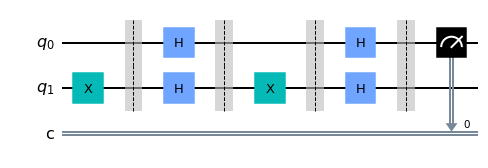

In [34]:
circ = deutsch_jozsa()
draw(circ)

If $\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$\ket{q_0}=0$, the oracle is constant. If $\ket{q_0}=1$, the oracle is balanced.

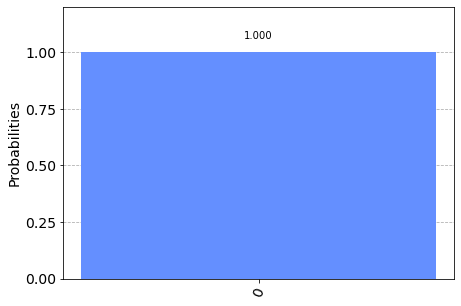

In [35]:
results, count = run(circ)
plot_histogram(count)